In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
data = pd.read_csv('Sample.csv')
print(data.shape)
data.sample(5)

(1200, 4)


,Timestamp,Acceleration_rms,Battery_voltage,Speed
1196,59.849875,0.147363,11.175593,60.0
217,10.859049,0.674238,13.526047,0.0
211,10.558799,0.315141,13.597721,0.0
391,19.566305,0.052959,13.178755,0.0
371,18.565471,1.204032,13.207154,0.0


In [3]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'] = data.index
data.dtypes

,0
Timestamp,int64
Acceleration_rms,float64
Battery_voltage,float64
Speed,float64


In [4]:
df = data.drop('Timestamp', axis = 1)
df.sample(5)

,Acceleration_rms,Battery_voltage,Speed
18,0.524932,13.842649,0.0
21,0.328980,13.837467,0.0
195,0.206321,13.459330,0.0
234,0.982359,13.485309,0.0
370,1.135007,13.084743,0.0


Text(0.5, 0, 'Timestamp (sec)')

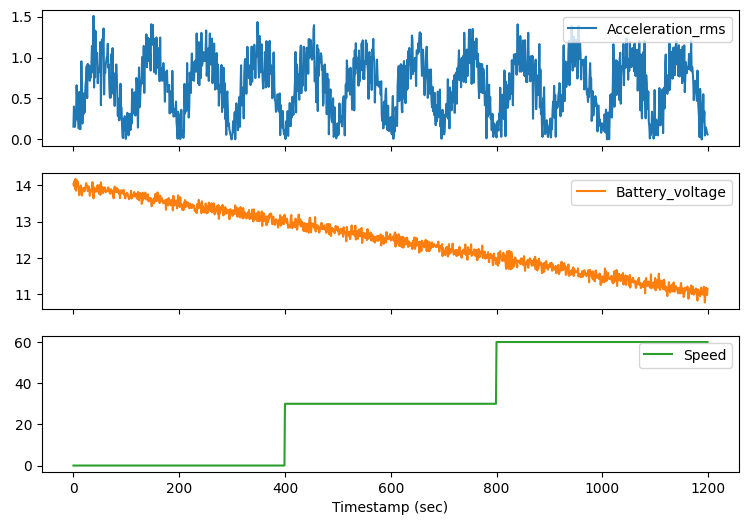

In [5]:
df.plot(subplots = True, figsize = (9, 6))
plt.xlabel('Timestamp (sec)')

In [9]:
#Determine Features

N = data.shape[0]  #length of the array = number of samples
time = data['Timestamp']
Fs = 20 	#sampling rate (Hz)
T = 1/Fs
accel = df['Acceleration_rms']
print(N, Fs, T)

1200 20 0.05


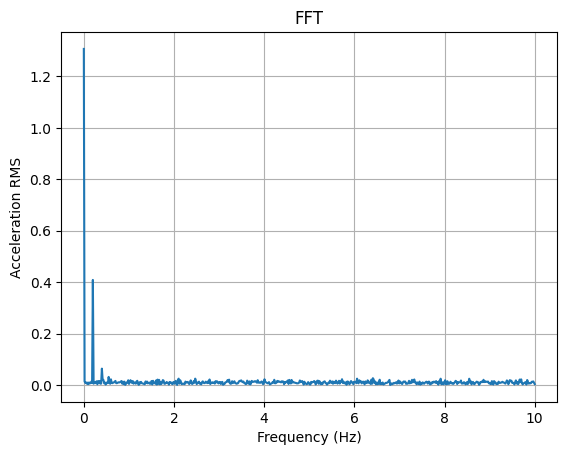

In [12]:
#Compute FFT and Plot

plt.figure()
xf = np.linspace(0, (1/(2*T)), int(N/2))
yf = scipy.fftpack.fft(np.array(accel))
plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Acceleration RMS')
plt.title('FFT')
plt.show()

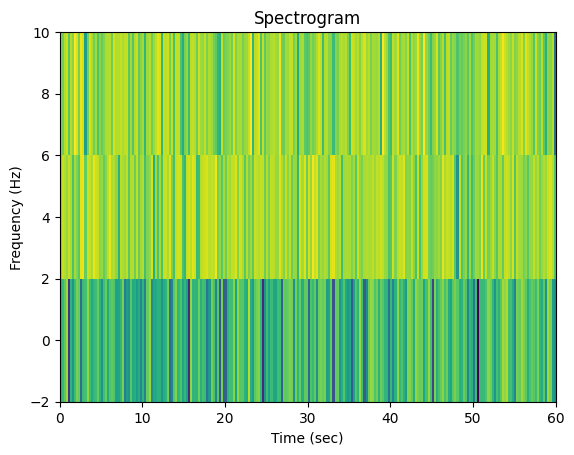

In [13]:
#Compute Spectrogram and Plot

plt.figure()
f, t2, Sxx = scipy.signal.spectrogram(accel, Fs, nperseg = int(Fs/4))
plt.pcolormesh(t2, f, np.log(Sxx))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('Spectrogram')
plt.show()